# Student Predictions - Regression

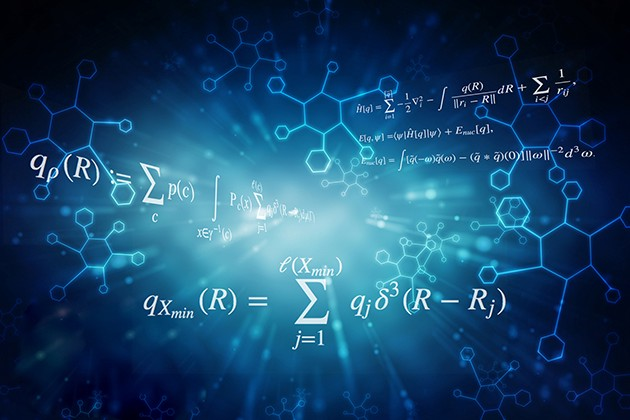

## Problem Statement

Can we predict students' performance in academics in STEM and Non-STEM?
<br>
Is there a difference in STEM and NON-STEM when looking at the performance of students and their features?



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import RepeatedKFold
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import Pipeline 
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.metrics import f1_score
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning) # ignore future warnings

In [2]:
math_df = pd.read_csv(r'student-mat.csv', sep=';')
por_df = pd.read_csv(r'student-por.csv', sep=';')

In [3]:
math_df.head()

school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6   5   6   6  
1      5        3      3     1     1      3        4   5   5   6  
2      4        3      2     2     3      3       10   7   8  10  
3      3        2      2     1     1      5        2  15  14  15  
4      4        3      2     1     2      5        4   6  10  10  

[5 rows x 33 columns]

In [4]:
por_df.head()

school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        4   0  11  11  
1      5        3      3     1     1      3        2   9  11  11  
2      4        3      2     2     3      3        6  12  13  12  
3      3        2      2     1     1      5        0  14  14  14  
4      4        3      2     1     2      5        0  11  13  13  

[5 rows x 33 columns]

## Data Wrangling and Visualization of the dataset

<ol>
    <li>Filling in missing data</li>
    <li>Smoothing-out noisy data</li>
    <li>Removing outliers and artifacts</li>
    <li>Correcting inconsistent data</li>
    <li>Removing duplicate data</li>
</ol>

## Check for missing values

There seems to be no missing values in the math data set or the poruese language dataset. 

In [5]:
math_df.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [6]:
por_df.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

## Check for dulicated values

There are no duplicated values in either of the datasets, so we can move onto the next step.

In [7]:
math_df[math_df.duplicated(keep=False)]

Empty DataFrame
Columns: [school, sex, age, address, famsize, Pstatus, Medu, Fedu, Mjob, Fjob, reason, guardian, traveltime, studytime, failures, schoolsup, famsup, paid, activities, nursery, higher, internet, romantic, famrel, freetime, goout, Dalc, Walc, health, absences, G1, G2, G3]
Index: []

[0 rows x 33 columns]

In [8]:
por_df[por_df.duplicated(keep=False)]

Empty DataFrame
Columns: [school, sex, age, address, famsize, Pstatus, Medu, Fedu, Mjob, Fjob, reason, guardian, traveltime, studytime, failures, schoolsup, famsup, paid, activities, nursery, higher, internet, romantic, famrel, freetime, goout, Dalc, Walc, health, absences, G1, G2, G3]
Index: []

[0 rows x 33 columns]

## Histograms of datasets

Many of the histograms are tail heavy, which may impact the performance of the ML alogorithms. We can adjust this to a more bell shaped curve transforming some of the features. The range of values goes from 0 - 500 in most feature spaces. There is not a major need for feature scaling.

### Math Dataset

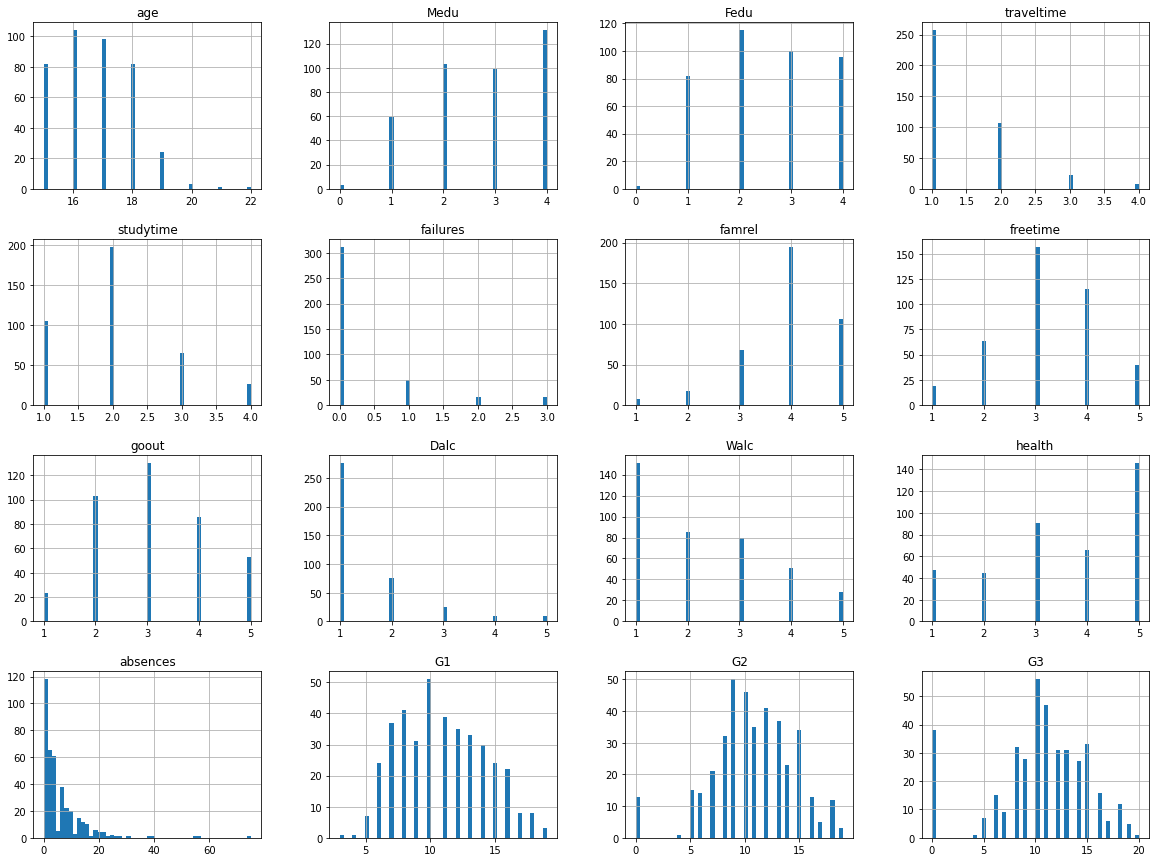

In [9]:
%matplotlib inline 
math_df.hist(bins = 50, figsize = (20, 15))
plt.show()

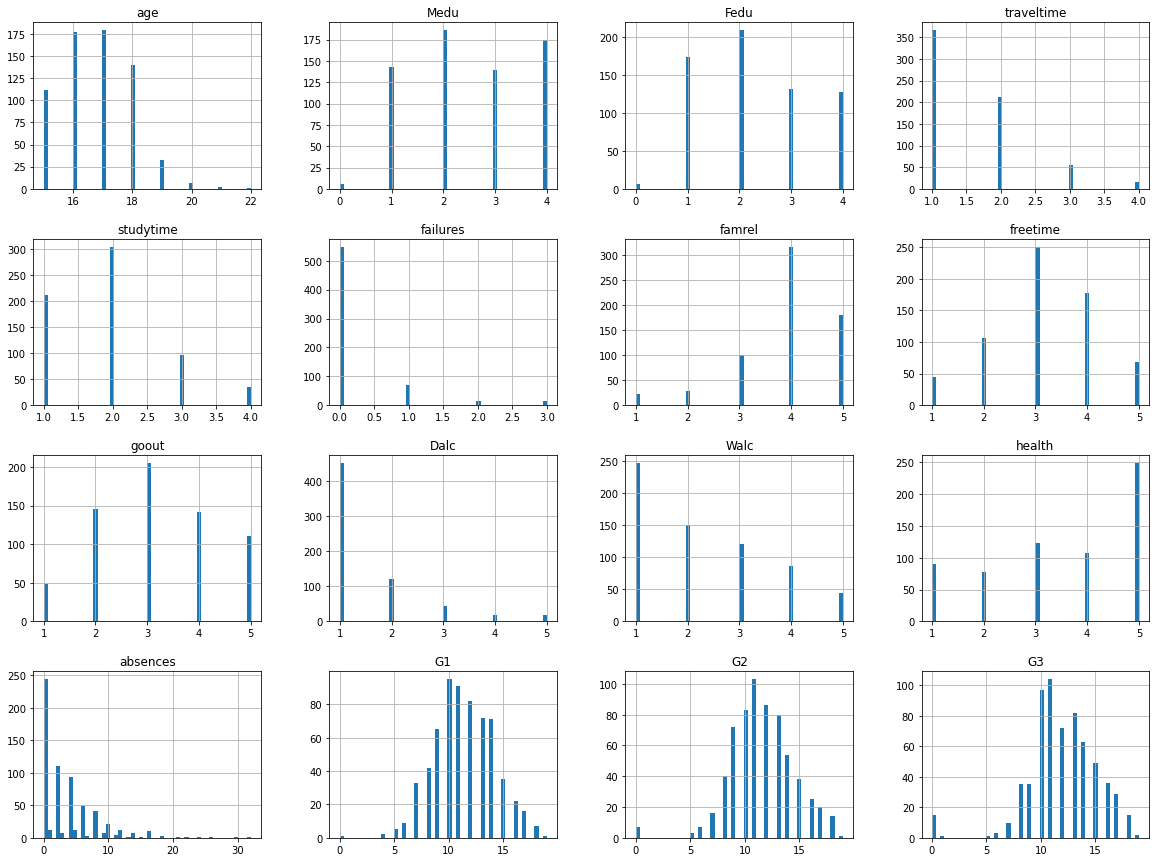

In [10]:
%matplotlib inline 
por_df.hist(bins = 50, figsize = (20, 15))
plt.show()

## Create a Test Set

In [11]:
train_set, test_set = train_test_split(math_df, test_size = 0.2, random_state = 42)

## Look for Correlations in the dataset

The distribution plot of the target variable grades shows it is slightly left skewed. It seems they're might be an outlier with students with a 0 in they're grades. G1, G2 and G3 are highly positvely correlated with each other which makes sense they are first period and second period grades. Fathers and mothers education are also highly positvely correlated with each other. Workday alcohol consumption and weekday alcohol consumption are also highly positvely correlated together. Weekly alcohol content and going out with friends are also highly correlated with each other. Since we have workday and weekend alcohol consumtion, we can remove one of these as they tend to correlate at a greater extent to other features and they are similar. 

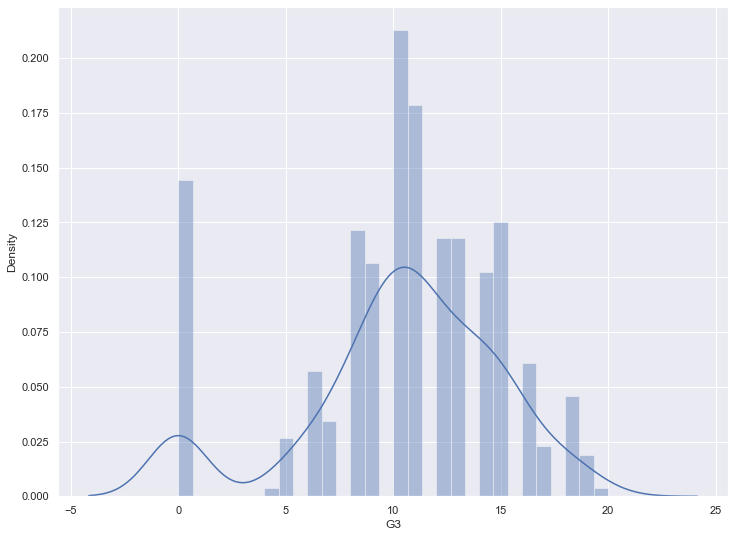

<AxesSubplot:>

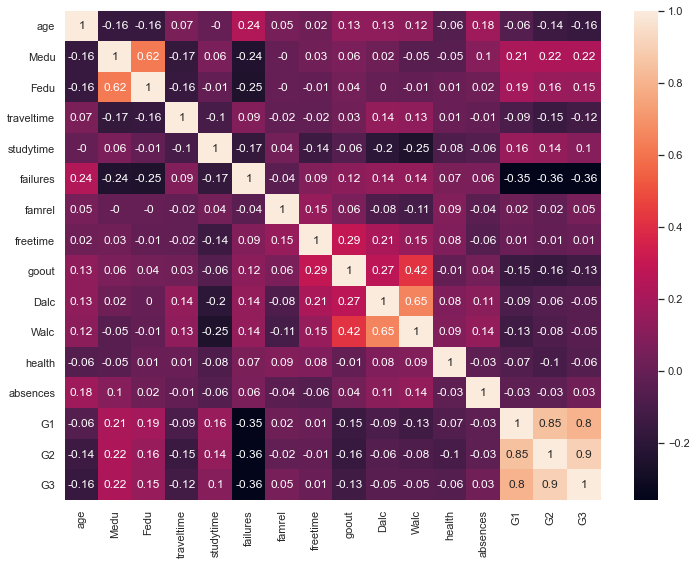

In [12]:
sns.set(rc = {'figure.figsize': (12, 9)})
sns.distplot(math_df['G3'], bins=30)
plt.show()
corr_matrix = math_df.corr().round(2)
sns.heatmap(corr_matrix, annot = True)

## Check the data types of each feature

In [13]:
math_df.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

In [14]:
por_df.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

## Use one hot encoding to change categorical data

After looking at the data types for the two datasets, we can see that there are data types that are generic objects. These represent cateogirical variables that would need to be encoded for our regression models. Features to change are:

<ol>
    <li>school</li>
    <li>sex</li>
    <li>address</li>
    <li>famsize</li>
    <li>Pstatus</li>
    <li>Mjob</li>
    <li>Fjob</li>
    <li>reason</li>
    <li>guardian</li>
    <li>schoolsup</li>
    <li>famsup</li>
    <li>paid</li>
    <li>activities</li>
    <li>nursery</li>
    <li>higher</li>
    <li>internet</li>
    <li>romantic</li>    
</ol>

In [15]:
math_df_encoded = math_df.copy()
labelencoder = LabelEncoder()
math_df_encoded['school_dummy'] = labelencoder.fit_transform(math_df_encoded["school"])
math_df_encoded['sex_dummy'] = labelencoder.fit_transform(math_df_encoded["sex"])
math_df_encoded['address_dummy'] = labelencoder.fit_transform(math_df_encoded["address"])
math_df_encoded['famsize_dummy'] = labelencoder.fit_transform(math_df_encoded["famsize"])
math_df_encoded['pstatus_dummy'] = labelencoder.fit_transform(math_df_encoded["Pstatus"])
math_df_encoded['fjob_dummy'] = labelencoder.fit_transform(math_df_encoded["Fjob"])
math_df_encoded['mjob_dummy'] = labelencoder.fit_transform(math_df_encoded["Mjob"])
math_df_encoded['reason_dummy'] = labelencoder.fit_transform(math_df_encoded["reason"])
math_df_encoded['guardian_dummy'] = labelencoder.fit_transform(math_df_encoded["guardian"])
math_df_encoded['schoolsup_dummy'] = labelencoder.fit_transform(math_df_encoded["schoolsup"])
math_df_encoded['famsup_dummy'] = labelencoder.fit_transform(math_df_encoded["famsup"])
math_df_encoded['paid_dummy'] = labelencoder.fit_transform(math_df_encoded["paid"])
math_df_encoded['activities_dummy'] = labelencoder.fit_transform(math_df_encoded["activities"])
math_df_encoded['nursery_dummy'] = labelencoder.fit_transform(math_df_encoded["nursery"])
math_df_encoded['higher_dummy'] = labelencoder.fit_transform(math_df_encoded["higher"])
math_df_encoded['internet_dummy'] = labelencoder.fit_transform(math_df_encoded["internet"])
math_df_encoded['romantic_dummy'] = labelencoder.fit_transform(math_df_encoded["romantic"])

In [16]:
cleaned_math_df = math_df_encoded[["school_dummy", "sex_dummy", "age", "address_dummy", "famsize_dummy", 
                                  "pstatus_dummy", "Medu", "Fedu", "mjob_dummy", "fjob_dummy", 
                                  "reason_dummy", "guardian_dummy", "traveltime", "studytime", 
                                  "failures", "schoolsup_dummy", "famsup_dummy", "paid_dummy", 
                                  "activities_dummy", "nursery_dummy", "higher_dummy", "internet_dummy", 
                                  "romantic_dummy", "famrel", "freetime", "goout", "Walc",
                                  "health", "absences", "G1", "G2", "G3"]]
cleaned_math_df

school_dummy  sex_dummy  age  address_dummy  famsize_dummy  \
0               0          0   18              1              0   
1               0          0   17              1              0   
2               0          0   15              1              1   
3               0          0   15              1              0   
4               0          0   16              1              0   
..            ...        ...  ...            ...            ...   
390             1          1   20              1              1   
391             1          1   17              1              1   
392             1          1   21              0              0   
393             1          1   18              0              1   
394             1          1   19              1              1   

     pstatus_dummy  Medu  Fedu  mjob_dummy  fjob_dummy  ...  romantic_dummy  \
0                0     4     4           0           4  ...               0   
1                1     1     1           0           2  ...               0   
2                1     1     1           0           2  ...               0   
3                1     4     2           1           3  ...               1   
4                1     3     3           2           2  ...               0   
..             ...   ...   ...         ...         ...  ...             ...   
390              0     2     2           3           3  ...               0   
391              1     3     1           3           3  ...               0   
392              1     1     1           2           2  ...               0   
393              1     3     2           3           2  ...               0   
394              1     1     1           2           0  ...               0   

     famrel  freetime  goout  Walc  health  absences  G1  G2  G3  
0         4         3      4     1       3         6   5   6   6  
1         5         3      3     1       3         4   5   5   6  
2         4         3      2     3       3        10   7   8  10  
3         3         2      2     1       5         2  15  14  15  
4         4         3      2     2       5         4   6  10  10  
..      ...       ...    ...   ...     ...       ...  ..  ..  ..  
390       5         5      4     5       4        11   9   9   9  
391       2         4      5     4       2         3  14  16  16  
392       5         5      3     3       3         3  10   8   7  
393       4         4      1     4       5         0  11  12  10  
394       3         2      3     3       5         5   8   9   9  

[395 rows x 32 columns]

In [17]:
port_df_encoded = por_df.copy()
labelencoder = LabelEncoder()
port_df_encoded['school_dummy'] = labelencoder.fit_transform(port_df_encoded["school"])
port_df_encoded['sex_dummy'] = labelencoder.fit_transform(port_df_encoded["sex"])
port_df_encoded['address_dummy'] = labelencoder.fit_transform(port_df_encoded["address"])
port_df_encoded['famsize_dummy'] = labelencoder.fit_transform(port_df_encoded["famsize"])
port_df_encoded['pstatus_dummy'] = labelencoder.fit_transform(port_df_encoded["Pstatus"])
port_df_encoded['fjob_dummy'] = labelencoder.fit_transform(port_df_encoded["Fjob"])
port_df_encoded['mjob_dummy'] = labelencoder.fit_transform(port_df_encoded["Mjob"])
port_df_encoded['reason_dummy'] = labelencoder.fit_transform(port_df_encoded["reason"])
port_df_encoded['guardian_dummy'] = labelencoder.fit_transform(port_df_encoded["guardian"])
port_df_encoded['schoolsup_dummy'] = labelencoder.fit_transform(port_df_encoded["schoolsup"])
port_df_encoded['famsup_dummy'] = labelencoder.fit_transform(port_df_encoded["famsup"])
port_df_encoded['paid_dummy'] = labelencoder.fit_transform(port_df_encoded["paid"])
port_df_encoded['activities_dummy'] = labelencoder.fit_transform(port_df_encoded["activities"])
port_df_encoded['nursery_dummy'] = labelencoder.fit_transform(port_df_encoded["nursery"])
port_df_encoded['higher_dummy'] = labelencoder.fit_transform(port_df_encoded["higher"])
port_df_encoded['internet_dummy'] = labelencoder.fit_transform(port_df_encoded["internet"])
port_df_encoded['romantic_dummy'] = labelencoder.fit_transform(port_df_encoded["romantic"])

In [18]:
cleaned_port_df = port_df_encoded[["school_dummy", "sex_dummy", "age", "address_dummy", "famsize_dummy", 
                                  "pstatus_dummy", "Medu", "Fedu", "mjob_dummy", "fjob_dummy", 
                                  "reason_dummy", "guardian_dummy", "traveltime", "studytime", 
                                  "failures", "schoolsup_dummy", "famsup_dummy", "paid_dummy", 
                                  "activities_dummy", "nursery_dummy", "higher_dummy", "internet_dummy", 
                                  "romantic_dummy", "famrel", "freetime", "goout", "Walc",
                                  "health", "absences", "G1", "G2", "G3"]]
port_df_encoded

school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0       GP   F   18       U     GT3       A     4     4   at_home   teacher   
1       GP   F   17       U     GT3       T     1     1   at_home     other   
2       GP   F   15       U     LE3       T     1     1   at_home     other   
3       GP   F   15       U     GT3       T     4     2    health  services   
4       GP   F   16       U     GT3       T     3     3     other     other   
..     ...  ..  ...     ...     ...     ...   ...   ...       ...       ...   
644     MS   F   19       R     GT3       T     2     3  services     other   
645     MS   F   18       U     LE3       T     3     1   teacher  services   
646     MS   F   18       U     GT3       T     1     1     other     other   
647     MS   M   17       U     LE3       T     3     1  services  services   
648     MS   M   18       R     LE3       T     3     2  services     other   

     ... reason_dummy guardian_dummy  schoolsup_dummy  famsup_dummy  \
0    ...            0              1                1             0   
1    ...            0              0                0             1   
2    ...            2              1                1             0   
3    ...            1              1                0             1   
4    ...            1              0                0             1   
..   ...          ...            ...              ...           ...   
644  ...            0              1                0             0   
645  ...            0              1                0             1   
646  ...            0              1                0             0   
647  ...            0              1                0             0   
648  ...            0              1                0             0   

     paid_dummy activities_dummy nursery_dummy higher_dummy internet_dummy  \
0             0                0             1            1              0   
1             0                0             0            1              1   
2             0                0             1            1              1   
3             0                1             1            1              1   
4             0                0             1            1              0   
..          ...              ...           ...          ...            ...   
644           0                1             0            1              1   
645           0                0             1            1              1   
646           0                1             1            1              0   
647           0                0             0            1              1   
648           0                0             0            1              1   

    romantic_dummy  
0                0  
1                0  
2                0  
3                1  
4                0  
..             ...  
644              0  
645              0  
646              0  
647              0  
648              0  

[649 rows x 50 columns]

## Create a training and test set

In [19]:
train_set, test_set = train_test_split(cleaned_math_df, test_size = 0.2, random_state = 42)

In [20]:
train_set2, test_set2 = train_test_split(cleaned_port_df, test_size = 0.2, random_state = 42)

## Select and train the model

### Ridge Regression

In [21]:
X_train, y_train = train_set.iloc[:,:-1], train_set.iloc[:,-1]
model = Ridge(alpha = 0.5, solver = "cholesky")
model.fit(X_train, y_train)

Ridge(alpha=0.5, solver='cholesky')

In [22]:
kf = KFold(n_splits=10, random_state=None)
result = cross_val_score(model , X_train, y_train, cv = kf)
print("Avg accuracy: {}".format(result.mean()))

Avg accuracy: 0.8185373726760293


In [23]:
X_train, y_train = train_set2.iloc[:,:-1], train_set2.iloc[:,-1]
model = Ridge(alpha = 0.5, solver = "cholesky")
model.fit(X_train, y_train)

Ridge(alpha=0.5, solver='cholesky')

In [24]:
kf = KFold(n_splits=10, random_state=None)
result = cross_val_score(model , X_train, y_train, cv = kf)
print("Avg accuracy: {}".format(result.mean()))

Avg accuracy: 0.8357585561896613


### Fine tuning the model using grid search and k fold cross validation 

In [25]:
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
model = RidgeCV(alphas=np.arange(0, 1, 0.01), cv=cv, scoring='neg_mean_absolute_error')
model.fit(X_train, y_train)
print("alpha: %f", model.alpha_)

alpha: %f 0.99


In [26]:
X_test, y_test = test_set.iloc[:,:-1], test_set.iloc[:,-1]
y_pred = model.predict(X_test)

### Metrics

In [27]:
print("------------ Metrics from Ridge Regression model -------------")
print("Mean Absolute Error: ", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error: ", mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(y_test, y_pred)))

------------ Metrics from Ridge Regression model -------------
Mean Absolute Error:  1.2210695725653726
Mean Squared Error:  4.829023194509516
Root Mean Squared Error:  2.197503855402651


# Predicting Passing Grades

In [28]:
from sklearn import tree
import matplotlib.pyplot as plt
import graphviz
import pydotplus
from IPython.display import Image
import tensorflow as tf
from tensorflow import keras
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, confusion_matrix
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve

In [29]:
def metrics(test_data, predictions, model_name, metrics_data, g1_g2):
    accuracy = accuracy_score(test_data, predictions)
    print('Accuracy:', accuracy)
    precision = precision_score(test_data, predictions)
    print('Precision:', precision)
    recall = recall_score(test_data, predictions)
    print('Recall:', recall)
    f1 = f1_score(y_test, y_pred)
    print('F1 Score', f1)
    print('Classification Report:')
    print(classification_report(test_data, predictions, target_names=['pass', 'fail']))
    print('Confusion Matrix:')
    print(confusion_matrix(test_data, predictions))
    return metrics_data.append({'model' : model_name, 'accuracy' : accuracy, 'precision' : precision, 
                                'recall' : recall, 'f1 score' : f1, 'includes G1/G2' : g1_g2}, ignore_index=True)

In [30]:
metrics_df = pd.DataFrame(columns=['model', 'accuracy', 'precision', 'recall', 'f1 score', 'includes G1/G2'])
metrics_df

Empty DataFrame
Columns: [model, accuracy, precision, recall, f1 score, includes G1/G2]
Index: []

## Load the dataset, handle data

Here we load the datasets for the two classes and merge them into one. A 'passed' column is created based on G3 (final) scores that indicates whether a student passed their class. The G3 column is then dropped, as that data is the basis for whether or not the student passed. 

In [31]:
dfs = [math_df, por_df]
data = pd.concat(dfs)
data['passed'] = 1
data.loc[data['G3'] >= 10,'passed'] = 0
data = data.drop(columns=['G3'])
data

school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0       GP   F   18       U     GT3       A     4     4   at_home   teacher   
1       GP   F   17       U     GT3       T     1     1   at_home     other   
2       GP   F   15       U     LE3       T     1     1   at_home     other   
3       GP   F   15       U     GT3       T     4     2    health  services   
4       GP   F   16       U     GT3       T     3     3     other     other   
..     ...  ..  ...     ...     ...     ...   ...   ...       ...       ...   
644     MS   F   19       R     GT3       T     2     3  services     other   
645     MS   F   18       U     LE3       T     3     1   teacher  services   
646     MS   F   18       U     GT3       T     1     1     other     other   
647     MS   M   17       U     LE3       T     3     1  services  services   
648     MS   M   18       R     LE3       T     3     2  services     other   

     ... famrel freetime  goout  Dalc  Walc health absences  G1  G2 passed  
0    ...      4        3      4     1     1      3        6   5   6      1  
1    ...      5        3      3     1     1      3        4   5   5      1  
2    ...      4        3      2     2     3      3       10   7   8      0  
3    ...      3        2      2     1     1      5        2  15  14      0  
4    ...      4        3      2     1     2      5        4   6  10      0  
..   ...    ...      ...    ...   ...   ...    ...      ...  ..  ..    ...  
644  ...      5        4      2     1     2      5        4  10  11      0  
645  ...      4        3      4     1     1      1        4  15  15      0  
646  ...      1        1      1     1     1      5        6  11  12      1  
647  ...      2        4      5     3     4      2        6  10  10      0  
648  ...      4        4      1     3     4      5        4  10  11      0  

[1044 rows x 33 columns]

## Use one hot encoding to change categorical data

Here we once again use one hot encoding to pass numerical values instead of other data types. New dummy columns are created for features that are non-ordinal and categorical such that they are appropriately handled by the classifiers.

In [32]:
data_with_dummies = pd.get_dummies(data, columns = ['Mjob', 'Fjob', 'reason', 'guardian'])

In [33]:
data_encoded = data_with_dummies.copy()
labelencoder = LabelEncoder()
data_encoded['school_dummy'] = labelencoder.fit_transform(data["school"])
data_encoded['sex_dummy'] = labelencoder.fit_transform(data["sex"])
data_encoded['address_dummy'] = labelencoder.fit_transform(data["address"])
data_encoded['famsize_dummy'] = labelencoder.fit_transform(data["famsize"])
data_encoded['pstatus_dummy'] = labelencoder.fit_transform(data["Pstatus"])
data_encoded['schoolsup_dummy'] = labelencoder.fit_transform(data["schoolsup"])
data_encoded['famsup_dummy'] = labelencoder.fit_transform(data["famsup"])
data_encoded['paid_dummy'] = labelencoder.fit_transform(data["paid"])
data_encoded['activities_dummy'] = labelencoder.fit_transform(data["activities"])
data_encoded['nursery_dummy'] = labelencoder.fit_transform(data["nursery"])
data_encoded['higher_dummy'] = labelencoder.fit_transform(data["higher"])
data_encoded['internet_dummy'] = labelencoder.fit_transform(data["internet"])
data_encoded['romantic_dummy'] = labelencoder.fit_transform(data["romantic"])
data_encoded.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid',
       'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2',
       'passed', 'Mjob_at_home', 'Mjob_health', 'Mjob_other', 'Mjob_services',
       'Mjob_teacher', 'Fjob_at_home', 'Fjob_health', 'Fjob_other',
       'Fjob_services', 'Fjob_teacher', 'reason_course', 'reason_home',
       'reason_other', 'reason_reputation', 'guardian_father',
       'guardian_mother', 'guardian_other', 'school_dummy', 'sex_dummy',
       'address_dummy', 'famsize_dummy', 'pstatus_dummy', 'schoolsup_dummy',
       'famsup_dummy', 'paid_dummy', 'activities_dummy', 'nursery_dummy',
       'higher_dummy', 'internet_dummy', 'romantic_dummy'],
      dtype='object')

In [34]:
data = data_encoded[["school_dummy", "sex_dummy", "age", "address_dummy", "famsize_dummy", 
                     "pstatus_dummy", "Medu", "Fedu", "traveltime", "studytime", 
                     "failures", "schoolsup_dummy", "famsup_dummy", "paid_dummy", 
                     "activities_dummy", "nursery_dummy", "higher_dummy", "internet_dummy", 
                     "romantic_dummy", "famrel", "freetime", "goout", "Walc",
                      "health", "absences", "G1", "G2", 'Fjob_at_home', 'Fjob_health', 'Fjob_other',
                     'Fjob_services', 'Fjob_teacher', 'reason_course', 'reason_home',
                     'reason_other', 'reason_reputation', 'guardian_father',
                     'guardian_mother', 'guardian_other', "passed"]]
data

school_dummy  sex_dummy  age  address_dummy  famsize_dummy  \
0               0          0   18              1              0   
1               0          0   17              1              0   
2               0          0   15              1              1   
3               0          0   15              1              0   
4               0          0   16              1              0   
..            ...        ...  ...            ...            ...   
644             1          0   19              0              0   
645             1          0   18              1              1   
646             1          0   18              1              0   
647             1          1   17              1              1   
648             1          1   18              0              1   

     pstatus_dummy  Medu  Fedu  traveltime  studytime  ...  Fjob_services  \
0                0     4     4           2          2  ...              0   
1                1     1     1           1          2  ...              0   
2                1     1     1           1          2  ...              0   
3                1     4     2           1          3  ...              1   
4                1     3     3           1          2  ...              0   
..             ...   ...   ...         ...        ...  ...            ...   
644              1     2     3           1          3  ...              0   
645              1     3     1           1          2  ...              1   
646              1     1     1           2          2  ...              0   
647              1     3     1           2          1  ...              1   
648              1     3     2           3          1  ...              0   

     Fjob_teacher  reason_course  reason_home  reason_other  \
0               1              1            0             0   
1               0              1            0             0   
2               0              0            0             1   
3               0              0            1             0   
4               0              0            1             0   
..            ...            ...          ...           ...   
644             0              1            0             0   
645             0              1            0             0   
646             0              1            0             0   
647             0              1            0             0   
648             0              1            0             0   

     reason_reputation  guardian_father  guardian_mother  guardian_other  \
0                    0                0                1               0   
1                    0                1                0               0   
2                    0                0                1               0   
3                    0                0                1               0   
4                    0                1                0               0   
..                 ...              ...              ...             ...   
644                  0                0                1               0   
645                  0                0                1               0   
646                  0                0                1               0   
647                  0                0                1               0   
648                  0                0                1               0   

     passed  
0         1  
1         1  
2         0  
3         0  
4         0  
..      ...  
644       0  
645       0  
646       1  
647       0  
648       0  

[1044 rows x 40 columns]

## Create train and test sets, correct data imbalance with SMOTE

Here the data is processed into X (input data) and y (target feature). Checking the value counts of the target feature revealed a large imbalance in the data, in which students who passed the class made up approximately 78% of the data. Accordingly, SMOTE (Synthetic Minority Oversampling Technique) was leveraged to correct this imbalance by creating synthetic samples based on the data of the minority class. Train and test sets were then derived from the X and y sets in order for the algorithms to be run.

In [35]:
X = data.iloc[:, np.r_[0:39]]
y = data['passed']

In [36]:
y.value_counts(ascending=True)

1    230
0    814
Name: passed, dtype: int64

In [37]:
sm = SMOTE(sampling_strategy='auto')
X, y = sm.fit_resample(X, y)

In [38]:
y.value_counts(ascending=True)

0    814
1    814
Name: passed, dtype: int64

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75)

In [40]:
y_train = y_train.astype('int')
y_test = y_test.astype('int')
X_train = X_train.astype('int')
X_test = X_test.astype('int')

## Decision Tree

A decision tree classifier is a type of machine learning model that predicts outcome classes by filtering input features into a decision tree in attempt to predict the output feature. They may be of use here because they are known to be useful with categorical features, of which there are many in this dataset.

In [41]:
# helper function to print tree data
def printTreeData(model, train_x, train_y, test_x, test_y):
    print('Tree depth:', model.get_depth())
    print('Total leaves:', model.get_n_leaves())
    print('Feature importance:', model.feature_importances_)
    print('Train Score:', model.score(train_x, train_y))
    print('Test Score:', model.score(test_x, test_y))

In [42]:
model = tree.DecisionTreeClassifier().fit(X_train, y_train)
y_pred = model.predict(X_test)

In [43]:
print("******* Metrics for Decision Tree ***********")
metrics_df = metrics(y_test, y_pred, 'Decision Tree', metrics_df, True)

******* Metrics for Decision Tree ***********
Accuracy: 0.8992628992628993
Precision: 0.8947368421052632
Recall: 0.9077669902912622
F1 Score 0.9012048192771085
Classification Report:
              precision    recall  f1-score   support

        pass       0.90      0.89      0.90       201
        fail       0.89      0.91      0.90       206

    accuracy                           0.90       407
   macro avg       0.90      0.90      0.90       407
weighted avg       0.90      0.90      0.90       407

Confusion Matrix:
[[179  22]
 [ 19 187]]


In [44]:
printTreeData(model, X_train, y_train, X_test, y_test)

Tree depth: 12
Total leaves: 75
Feature importance: [0.00364622 0.00483058 0.00447728 0.00496372 0.00462852 0.
 0.         0.00294845 0.00386486 0.00760124 0.00619844 0.00690043
 0.         0.00675414 0.         0.00464108 0.         0.00354906
 0.00601805 0.00107374 0.00975738 0.01015578 0.00336742 0.00786774
 0.02407763 0.02948829 0.79260506 0.00665103 0.00491409 0.00853739
 0.0013386  0.00254105 0.00317678 0.00873616 0.00279327 0.00273845
 0.00343986 0.00571821 0.        ]
Train Score: 1.0
Test Score: 0.8992628992628993


### Display Tree

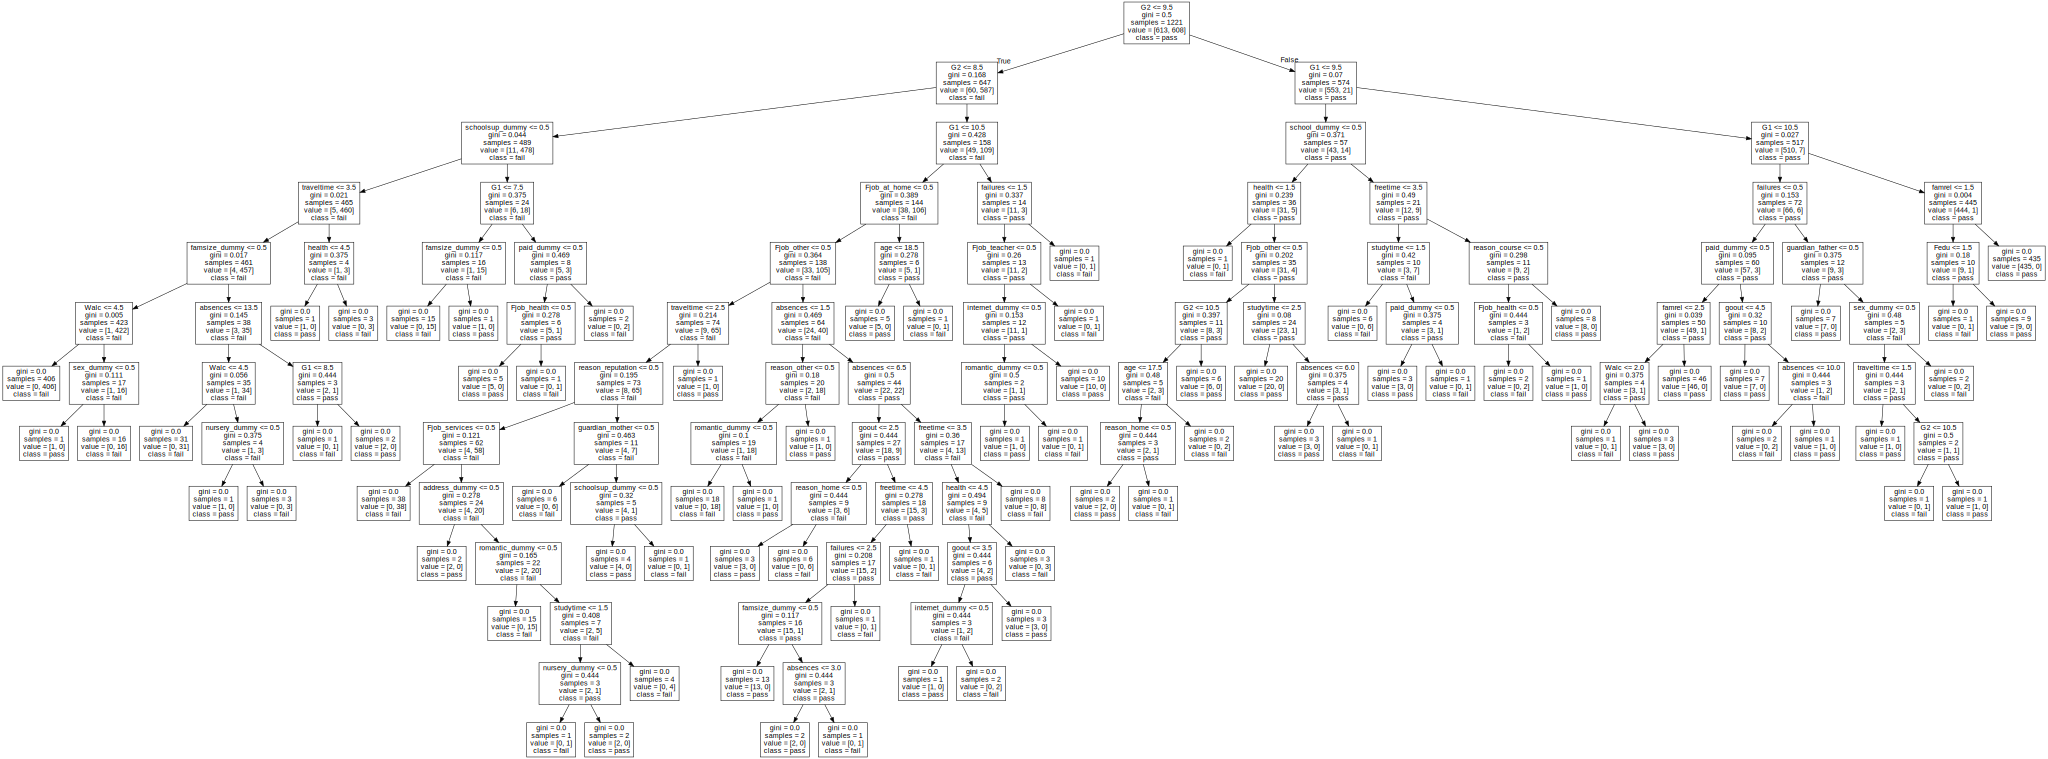

In [45]:
dot_data = tree.export_graphviz(model, feature_names=["school_dummy", "sex_dummy", "age", "address_dummy", "famsize_dummy", 
                     "pstatus_dummy", "Medu", "Fedu", "traveltime", "studytime", 
                     "failures", "schoolsup_dummy", "famsup_dummy", "paid_dummy", 
                     "activities_dummy", "nursery_dummy", "higher_dummy", "internet_dummy", 
                     "romantic_dummy", "famrel", "freetime", "goout", "Walc",
                      "health", "absences", "G1", "G2", 'Fjob_at_home', 'Fjob_health', 'Fjob_other',
                     'Fjob_services', 'Fjob_teacher', 'reason_course', 'reason_home',
                     'reason_other', 'reason_reputation', 'guardian_father',
                     'guardian_mother', 'guardian_other'], class_names=['pass', 'fail'])
graph = graphviz.Source(dot_data)
graph

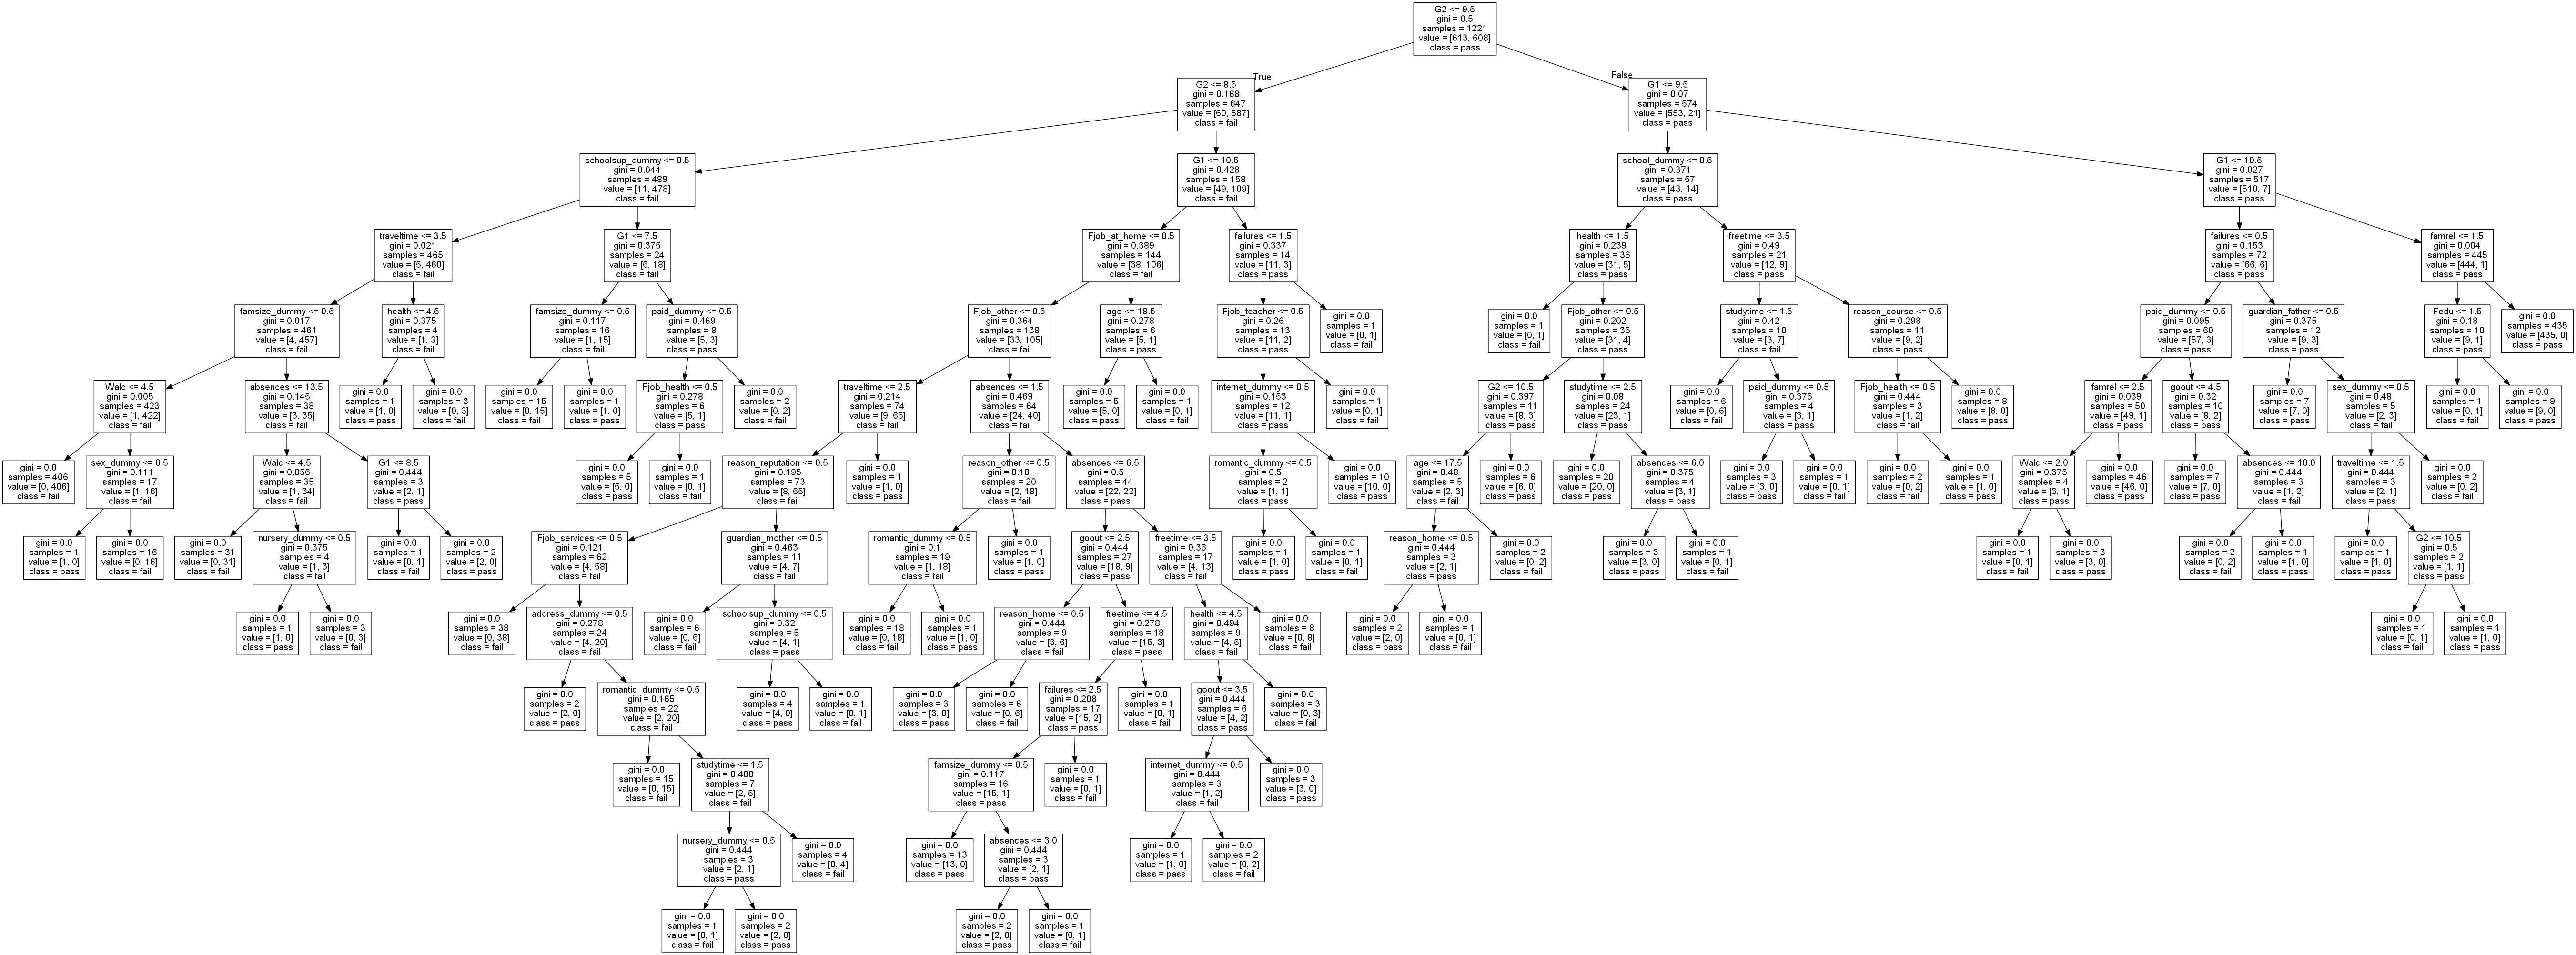

In [46]:
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

## Nueral Network

A neural network is another type of classficiation model leveraged in data mining. The model is based on the brain, designed such that input nodes are connected to output (classification) node(s) via hidden nodes and "synapes" (edges). As the neural network is learning and synapses/edges are transpersed by the data, the weights change according to whether or not the data point was appropriately classified.

In [47]:
X_train_float = np.asarray(X_train).astype('float32')
y_train_float = np.asarray(y_train).astype('float32').reshape((-1,1))
X_test_float = np.asarray(X_test).astype('float32')
y_test_float = np.asarray(y_test).astype('float32').reshape((-1,1))

X_train_tensor = tf.convert_to_tensor(X_train_float)
y_train_tensor = tf.convert_to_tensor(y_train_float)
X_test_tensor = tf.convert_to_tensor(X_test)
y_test_tensor = tf.convert_to_tensor(y_test)

In [48]:
model = keras.Sequential([
    keras.layers.Dense(400, input_shape=(39,), activation='relu'),
    keras.layers.Dense(200, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='SGD',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train_tensor, y_train_tensor, epochs=250)
y_pred = model.predict_classes(X_test)

Epoch 1/250
39/39 [==============================] - 1s 1ms/step - loss: 0.6195 - accuracy: 0.7112
Epoch 2/250
39/39 [==============================] - 0s 1ms/step - loss: 0.3067 - accuracy: 0.8776
Epoch 3/250
39/39 [==============================] - 0s 1ms/step - loss: 0.2845 - accuracy: 0.8805
Epoch 4/250
39/39 [==============================] - 0s 1ms/step - loss: 0.3089 - accuracy: 0.8596
Epoch 5/250
39/39 [==============================] - 0s 1ms/step - loss: 0.2687 - accuracy: 0.8802
Epoch 6/250
39/39 [==============================] - 0s 1ms/step - loss: 0.3214 - accuracy: 0.8795
Epoch 7/250
39/39 [==============================] - 0s 1ms/step - loss: 0.2773 - accuracy: 0.8736
Epoch 8/250
39/39 [==============================] - 0s 1ms/step - loss: 0.2633 - accuracy: 0.8789
Epoch 9/250
39/39 [==============================] - 0s 1ms/step - loss: 0.2378 - accuracy: 0.9106
Epoch 10/250
39/39 [==============================] - 0s 1ms/step - loss: 0.2593 - accuracy: 0.8760
Epoch 11/

39/39 [==============================] - 0s 1ms/step - loss: 0.1572 - accuracy: 0.9388
Epoch 84/250
39/39 [==============================] - 0s 1ms/step - loss: 0.1609 - accuracy: 0.9416
Epoch 85/250
39/39 [==============================] - 0s 1ms/step - loss: 0.1306 - accuracy: 0.9503
Epoch 86/250
39/39 [==============================] - 0s 1ms/step - loss: 0.1333 - accuracy: 0.9533
Epoch 87/250
39/39 [==============================] - 0s 1ms/step - loss: 0.1594 - accuracy: 0.9456
Epoch 88/250
39/39 [==============================] - 0s 1ms/step - loss: 0.1853 - accuracy: 0.9286
Epoch 89/250
39/39 [==============================] - 0s 1ms/step - loss: 0.1534 - accuracy: 0.9446
Epoch 90/250
39/39 [==============================] - 0s 1ms/step - loss: 0.1667 - accuracy: 0.9305
Epoch 91/250
39/39 [==============================] - 0s 1ms/step - loss: 0.1381 - accuracy: 0.9411
Epoch 92/250
39/39 [==============================] - 0s 1ms/step - loss: 0.1430 - accuracy: 0.9476
Epoch 93/250


39/39 [==============================] - 0s 1ms/step - loss: 0.0770 - accuracy: 0.9705
Epoch 165/250
39/39 [==============================] - 0s 1ms/step - loss: 0.0966 - accuracy: 0.9555
Epoch 166/250
39/39 [==============================] - 0s 1ms/step - loss: 0.0776 - accuracy: 0.9808
Epoch 167/250
39/39 [==============================] - 0s 1ms/step - loss: 0.0812 - accuracy: 0.9697
Epoch 168/250
39/39 [==============================] - 0s 1ms/step - loss: 0.1047 - accuracy: 0.9623
Epoch 169/250
39/39 [==============================] - 0s 1ms/step - loss: 0.0802 - accuracy: 0.9756
Epoch 170/250
39/39 [==============================] - 0s 1ms/step - loss: 0.0746 - accuracy: 0.9774
Epoch 171/250
39/39 [==============================] - 0s 1ms/step - loss: 0.1037 - accuracy: 0.9605
Epoch 172/250
39/39 [==============================] - 0s 1ms/step - loss: 0.1479 - accuracy: 0.9439
Epoch 173/250
39/39 [==============================] - 0s 1ms/step - loss: 0.0940 - accuracy: 0.9682
Epoc

39/39 [==============================] - 0s 1ms/step - loss: 0.0587 - accuracy: 0.9769
Epoch 246/250
39/39 [==============================] - 0s 1ms/step - loss: 0.1043 - accuracy: 0.9563
Epoch 247/250
39/39 [==============================] - 0s 1ms/step - loss: 0.0775 - accuracy: 0.9700
Epoch 248/250
39/39 [==============================] - 0s 1ms/step - loss: 0.0525 - accuracy: 0.9808
Epoch 249/250
39/39 [==============================] - 0s 1ms/step - loss: 0.1415 - accuracy: 0.9508
Epoch 250/250
39/39 [==============================] - 0s 1ms/step - loss: 0.0448 - accuracy: 0.9877


C:\Users\alexm\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [49]:
results = model.evaluate(X_test_tensor, y_test_tensor)
print("******* Metrics for Nueral Network ***********")
metrics_df = metrics(y_test, np.rint(y_pred), 'Neural Network', metrics_df, True)

13/13 [==============================] - 0s 1ms/step - loss: 0.2011 - accuracy: 0.9410
******* Metrics for Nueral Network ***********
Accuracy: 0.941031941031941
Precision: 0.9136363636363637
Recall: 0.9757281553398058
F1 Score 0.943661971830986
Classification Report:
              precision    recall  f1-score   support

        pass       0.97      0.91      0.94       201
        fail       0.91      0.98      0.94       206

    accuracy                           0.94       407
   macro avg       0.94      0.94      0.94       407
weighted avg       0.94      0.94      0.94       407

Confusion Matrix:
[[182  19]
 [  5 201]]


## Logistic Regression

A frequently used statistics method, logistic regression has been around for a long time in the study of regression. Computer scientist have leveredge this model in the context of data mining to classify data. Essentially, regression is run on the data, and a sigmoid function classifies the predicted value as to be in one of two classes.

In [50]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [51]:
y_pred = model.predict(X_test)

In [52]:
print("******* Metrics for Logistic Regression ***********")
metrics_df = metrics(y_test, y_pred, 'Logistic Regression', metrics_df, True)

******* Metrics for Logistic Regression ***********
Accuracy: 0.9533169533169533
Precision: 0.9389671361502347
Recall: 0.970873786407767
F1 Score 0.954653937947494
Classification Report:
              precision    recall  f1-score   support

        pass       0.97      0.94      0.95       201
        fail       0.94      0.97      0.95       206

    accuracy                           0.95       407
   macro avg       0.95      0.95      0.95       407
weighted avg       0.95      0.95      0.95       407

Confusion Matrix:
[[188  13]
 [  6 200]]


## Ensemble Methods: Random Forest

In [53]:
model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)

RandomForestClassifier()

In [54]:
y_pred = model.predict(X_test)

In [55]:
print("******* Metrics for Random Forest ***********")
metrics_df = metrics(y_test, y_pred, 'Random Forest', metrics_df, True)

******* Metrics for Random Forest ***********
Accuracy: 0.9582309582309583
Precision: 0.9354838709677419
Recall: 0.9854368932038835
F1 Score 0.9598108747044918
Classification Report:
              precision    recall  f1-score   support

        pass       0.98      0.93      0.96       201
        fail       0.94      0.99      0.96       206

    accuracy                           0.96       407
   macro avg       0.96      0.96      0.96       407
weighted avg       0.96      0.96      0.96       407

Confusion Matrix:
[[187  14]
 [  3 203]]


## Support Vector Machines

A support vector machine is capable of performing linear, non-linear, classification and even outlier detection. Since SVM's are particulary useful in complex and small to medium sized data sets, it would be useful to implmenent this model in conjecture with the other models already created. SVM's are sensitive to feauture scaling, all of the feautres seem tto be within a good range except for g1 and g2. This may hinider the performance of tbe SVM and we may look into it later. From our previous discusson the class labels are also heavily weighted towards one class, so SMOTE is also used on this SVM model to make the data more balanced. 

In [56]:
svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("linear_svc", LinearSVC(C=1, loss="hinge", max_iter=50000)),
])

svm_clf.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc', LinearSVC(C=1, loss='hinge', max_iter=50000))])

In [57]:
y_pred = svm_clf.predict(X_test)

In [58]:
print("******* Metrics for SVM ***********")
metrics_df = metrics(y_test, y_pred, 'SVM', metrics_df, True)

******* Metrics for SVM ***********
Accuracy: 0.9508599508599509
Precision: 0.9514563106796117
Recall: 0.9514563106796117
F1 Score 0.9514563106796117
Classification Report:
              precision    recall  f1-score   support

        pass       0.95      0.95      0.95       201
        fail       0.95      0.95      0.95       206

    accuracy                           0.95       407
   macro avg       0.95      0.95      0.95       407
weighted avg       0.95      0.95      0.95       407

Confusion Matrix:
[[191  10]
 [ 10 196]]


The first row of the matrix shows that 196 of the instances were correctly classified as failed, while 7 were wrongly classified as failed. The matrix in the second rows show that 12 of the instaces were wrongly classidffied as passed the class, whereas, 192 of the istaces were correctly classified as pass. The precision shows that 96% of the data was accuratetly predicted as passed, recall is also high at detecting 94% of the passed labels. The f1 score got a high score since both precision and recall was high. We might want to examine recall as we should care more about the precision aspect of achiveing accurate predictions on students passing the class, rather than let false positives influence the outcome. We might prefer to have a model that reject many passed students but keeps only students who show more signs of passing the class, making the model a lot more coservative in its predictions. That way we are sure that when generalizing to more training data, the model's prediction accuracy can remain high. 

## Metrics comparison between models

In [59]:
metrics_df

model  accuracy  precision    recall  f1 score includes G1/G2
0        Decision Tree  0.899263   0.894737  0.907767  0.901205           True
1       Neural Network  0.941032   0.913636  0.975728  0.943662           True
2  Logistic Regression  0.953317   0.938967  0.970874  0.954654           True
3        Random Forest  0.958231   0.935484  0.985437  0.959811           True
4                  SVM  0.950860   0.951456  0.951456  0.951456           True

# Without G1 and G2

In [60]:
X_train= X_train.drop(['G1', 'G2'], axis=1)
X_test = X_test.drop(['G1', 'G2'], axis=1)

In [61]:
X_train

school_dummy  sex_dummy  age  address_dummy  famsize_dummy  \
1218             0          1   17              0              1   
1274             0          0   17              1              0   
1362             0          0   17              1              0   
1575             0          0   16              1              0   
713              0          0   18              0              0   
...            ...        ...  ...            ...            ...   
553              0          0   15              1              0   
614              0          0   17              1              0   
613              0          0   16              0              0   
1524             0          0   16              1              0   
708              0          0   18              1              1   

      pstatus_dummy  Medu  Fedu  traveltime  studytime  ...  Fjob_other  \
1218              1     1     1           3          1  ...           0   
1274              1     3     2           1          1  ...           0   
1362              1     3     2           1          1  ...           0   
1575              0     3     1           1          2  ...           1   
713               0     3     2           2          2  ...           0   
...             ...   ...   ...         ...        ...  ...         ...   
553               1     3     2           1          2  ...           0   
614               1     3     4           1          3  ...           0   
613               1     2     2           2          4  ...           0   
1524              0     1     2           1          2  ...           0   
708               1     1     1           2          2  ...           1   

      Fjob_services  Fjob_teacher  reason_course  reason_home  reason_other  \
1218              0             0              1            0             0   
1274              1             0              0            0             0   
1362              1             0              0            0             0   
1575              0             0              0            0             0   
713               1             0              0            1             0   
...             ...           ...            ...          ...           ...   
553               1             0              0            1             0   
614               1             0              0            1             0   
613               1             0              0            0             0   
1524              0             0              0            0             0   
708               0             0              0            1             0   

      reason_reputation  guardian_father  guardian_mother  guardian_other  
1218                  0                0                1               0  
1274                  0                0                1               0  
1362                  0                0                1               0  
1575                  0                0                0               0  
713                   0                0                1               0  
...                 ...              ...              ...             ...  
553                   0                1                0               0  
614                   0                0                1               0  
613                   1                0                1               0  
1524                  0                0                0               0  
708                   0                0                1               0  

[1221 rows x 37 columns]

## Decision Tree

In [62]:
# helper function to print tree data
def printTreeData(model, train_x, train_y, test_x, test_y):
    print('Tree depth:', model.get_depth())
    print('Total leaves:', model.get_n_leaves())
    print('Feature importance:', model.feature_importances_)
    print('Train Score:', model.score(train_x, train_y))
    print('Test Score:', model.score(test_x, test_y))

In [63]:
model = tree.DecisionTreeClassifier().fit(X_train, y_train)
y_pred = model.predict(X_test)

In [64]:
print("******* Metrics for Decision Tree ***********")
metrics_df = metrics(y_test, y_pred, 'Decision Tree', metrics_df, False)

******* Metrics for Decision Tree ***********
Accuracy: 0.8132678132678133
Precision: 0.8066037735849056
Recall: 0.8300970873786407
F1 Score 0.8181818181818181
Classification Report:
              precision    recall  f1-score   support

        pass       0.82      0.80      0.81       201
        fail       0.81      0.83      0.82       206

    accuracy                           0.81       407
   macro avg       0.81      0.81      0.81       407
weighted avg       0.81      0.81      0.81       407

Confusion Matrix:
[[160  41]
 [ 35 171]]


In [65]:
printTreeData(model, X_train, y_train, X_test, y_test)

Tree depth: 17
Total leaves: 221
Feature importance: [0.00818054 0.02091603 0.03907854 0.01141542 0.041859   0.00426623
 0.02506923 0.02725223 0.02607744 0.03258609 0.06793422 0.00489954
 0.00569717 0.02275321 0.01025617 0.00772795 0.09027831 0.00837155
 0.00652232 0.02511371 0.04351245 0.03407952 0.02891798 0.02914171
 0.08691833 0.0056106  0.00045897 0.00448868 0.00851971 0.0080162
 0.02510396 0.03671927 0.02338675 0.02236825 0.04686901 0.07088817
 0.03874553]
Train Score: 0.9983619983619983
Test Score: 0.8132678132678133


### Display Tree

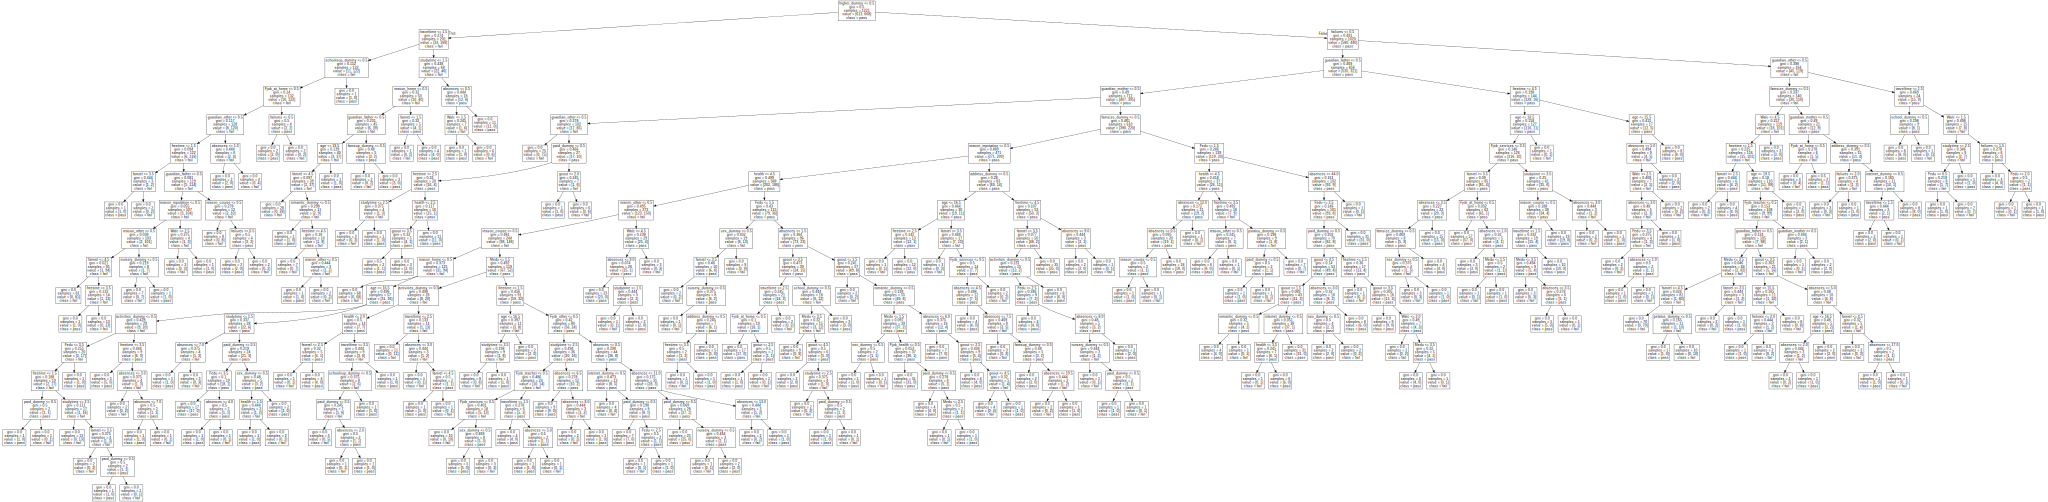

In [66]:
dot_data = tree.export_graphviz(model, feature_names=["school_dummy", "sex_dummy", "age", "address_dummy", "famsize_dummy", 
                     "pstatus_dummy", "Medu", "Fedu", "traveltime", "studytime", 
                     "failures", "schoolsup_dummy", "famsup_dummy", "paid_dummy", 
                     "activities_dummy", "nursery_dummy", "higher_dummy", "internet_dummy", 
                     "romantic_dummy", "famrel", "freetime", "goout", "Walc",
                      "health", "absences", 'Fjob_at_home', 'Fjob_health', 'Fjob_other',
                     'Fjob_services', 'Fjob_teacher', 'reason_course', 'reason_home',
                     'reason_other', 'reason_reputation', 'guardian_father',
                     'guardian_mother', 'guardian_other'], class_names=['pass', 'fail'])
graph = graphviz.Source(dot_data)
graph

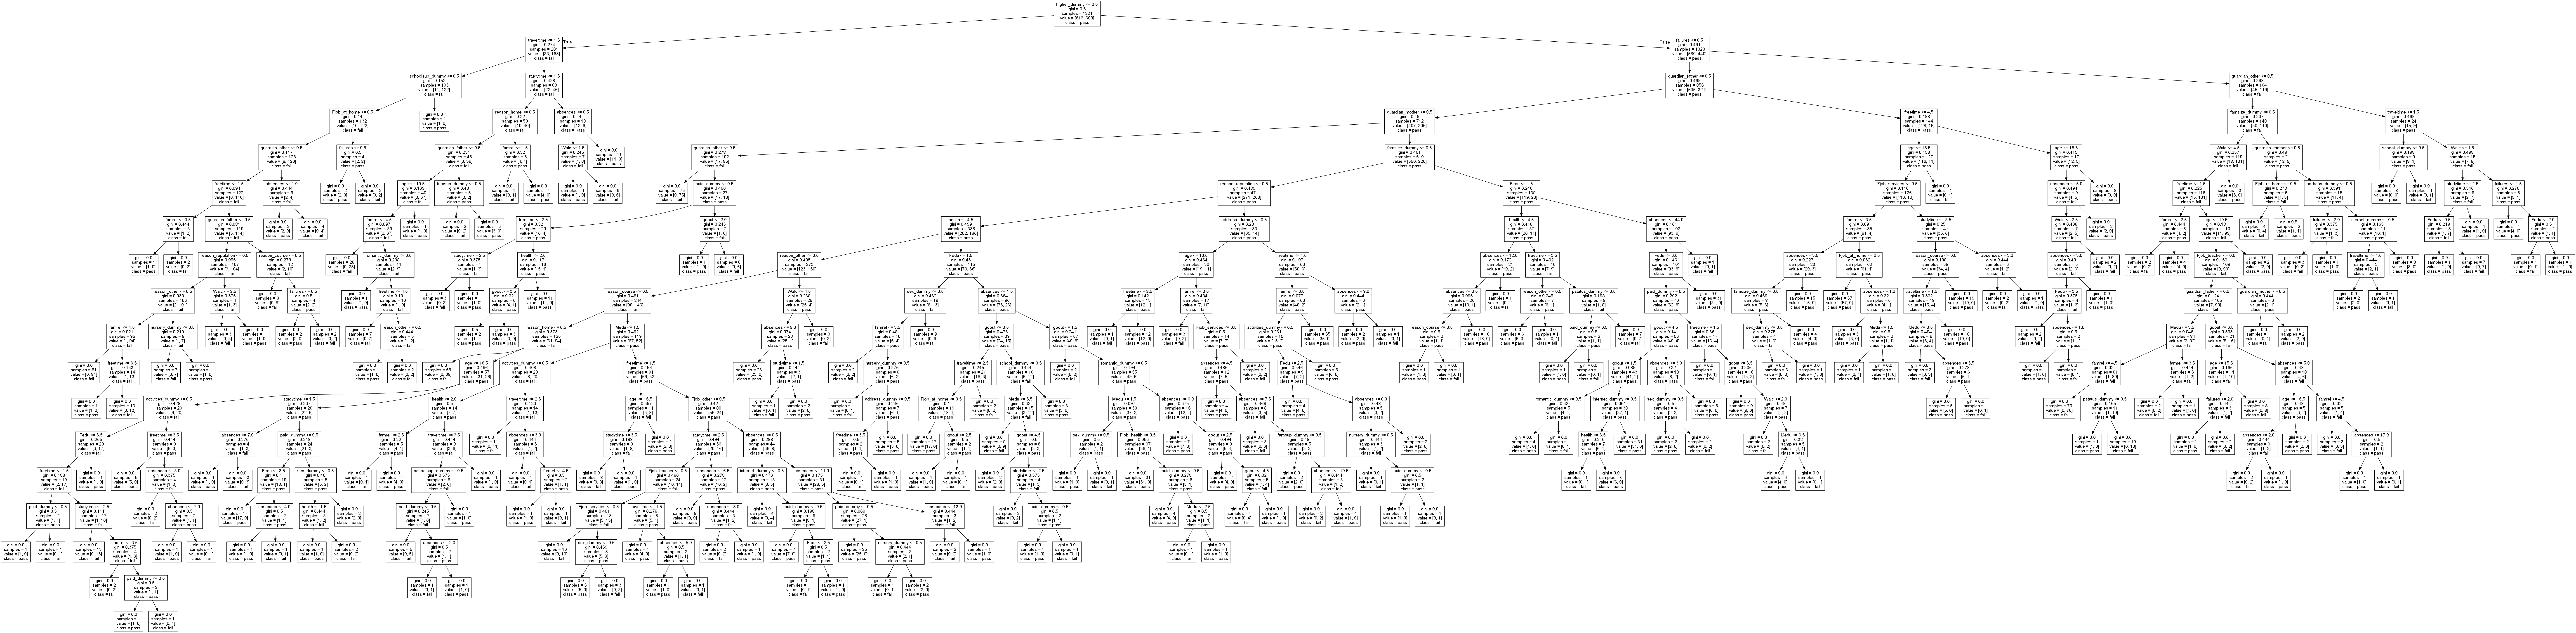

In [67]:
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

## Nueral Network

In [68]:
X_train_float = np.asarray(X_train).astype('float32')
y_train_float = np.asarray(y_train).astype('float32').reshape((-1,1))
X_test_float = np.asarray(X_test).astype('float32')
y_test_float = np.asarray(y_test).astype('float32').reshape((-1,1))

X_train_tensor = tf.convert_to_tensor(X_train_float)
y_train_tensor = tf.convert_to_tensor(y_train_float)
X_test_tensor = tf.convert_to_tensor(X_test)
y_test_tensor = tf.convert_to_tensor(y_test)

In [69]:
model = keras.Sequential([
    keras.layers.Dense(400, input_shape=(37,), activation='relu'),
    keras.layers.Dense(200, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='SGD',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train_tensor, y_train_tensor, epochs=250)
y_pred = model.predict_classes(X_test)

Epoch 1/250
39/39 [==============================] - 1s 1ms/step - loss: 0.7118 - accuracy: 0.5061
Epoch 2/250
39/39 [==============================] - 0s 1ms/step - loss: 0.6592 - accuracy: 0.6112
Epoch 3/250
39/39 [==============================] - 0s 1ms/step - loss: 0.6330 - accuracy: 0.6299
Epoch 4/250
39/39 [==============================] - 0s 1ms/step - loss: 0.6204 - accuracy: 0.6815
Epoch 5/250
39/39 [==============================] - 0s 1ms/step - loss: 0.6173 - accuracy: 0.6747
Epoch 6/250
39/39 [==============================] - 0s 1ms/step - loss: 0.5913 - accuracy: 0.6857
Epoch 7/250
39/39 [==============================] - 0s 1ms/step - loss: 0.6312 - accuracy: 0.6668
Epoch 8/250
39/39 [==============================] - 0s 1ms/step - loss: 0.5735 - accuracy: 0.7246
Epoch 9/250
39/39 [==============================] - 0s 1ms/step - loss: 0.5716 - accuracy: 0.7010
Epoch 10/250
39/39 [==============================] - 0s 1ms/step - loss: 0.5388 - accuracy: 0.7450
Epoch 11/

39/39 [==============================] - 0s 1ms/step - loss: 0.3455 - accuracy: 0.8578
Epoch 84/250
39/39 [==============================] - 0s 1ms/step - loss: 0.4020 - accuracy: 0.8235
Epoch 85/250
39/39 [==============================] - 0s 1ms/step - loss: 0.3895 - accuracy: 0.8338
Epoch 86/250
39/39 [==============================] - 0s 1ms/step - loss: 0.3768 - accuracy: 0.8352
Epoch 87/250
39/39 [==============================] - 0s 1ms/step - loss: 0.4369 - accuracy: 0.8178
Epoch 88/250
39/39 [==============================] - 0s 1ms/step - loss: 0.3382 - accuracy: 0.8531
Epoch 89/250
39/39 [==============================] - 0s 1ms/step - loss: 0.3583 - accuracy: 0.8350
Epoch 90/250
39/39 [==============================] - 0s 1ms/step - loss: 0.3625 - accuracy: 0.8312
Epoch 91/250
39/39 [==============================] - 0s 1ms/step - loss: 0.3575 - accuracy: 0.8370
Epoch 92/250
39/39 [==============================] - 0s 1ms/step - loss: 0.4765 - accuracy: 0.8110
Epoch 93/250


39/39 [==============================] - 0s 1ms/step - loss: 0.2244 - accuracy: 0.9140
Epoch 165/250
39/39 [==============================] - 0s 1ms/step - loss: 0.2013 - accuracy: 0.9327
Epoch 166/250
39/39 [==============================] - 0s 1ms/step - loss: 0.2416 - accuracy: 0.8965
Epoch 167/250
39/39 [==============================] - 0s 1ms/step - loss: 0.2871 - accuracy: 0.8812
Epoch 168/250
39/39 [==============================] - 0s 1ms/step - loss: 0.2517 - accuracy: 0.9047
Epoch 169/250
39/39 [==============================] - 0s 1ms/step - loss: 0.2155 - accuracy: 0.9146
Epoch 170/250
39/39 [==============================] - 0s 1ms/step - loss: 0.2368 - accuracy: 0.9096
Epoch 171/250
39/39 [==============================] - 0s 1ms/step - loss: 0.3184 - accuracy: 0.8628
Epoch 172/250
39/39 [==============================] - 0s 1ms/step - loss: 0.2173 - accuracy: 0.9036
Epoch 173/250
39/39 [==============================] - 0s 1ms/step - loss: 0.3445 - accuracy: 0.8420
Epoc

39/39 [==============================] - 0s 1ms/step - loss: 0.4631 - accuracy: 0.8514
Epoch 246/250
39/39 [==============================] - 0s 1ms/step - loss: 0.1562 - accuracy: 0.9450
Epoch 247/250
39/39 [==============================] - 0s 1ms/step - loss: 0.1114 - accuracy: 0.9587
Epoch 248/250
39/39 [==============================] - 0s 1ms/step - loss: 0.5741 - accuracy: 0.8430
Epoch 249/250
39/39 [==============================] - 0s 1ms/step - loss: 0.1194 - accuracy: 0.9742
Epoch 250/250
39/39 [==============================] - 0s 1ms/step - loss: 0.2740 - accuracy: 0.8855


C:\Users\alexm\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [70]:
results = model.evaluate(X_test_tensor, y_test_tensor)
print("******* Metrics for Nueral Network ***********")
metrics_df = metrics(y_test, np.rint(y_pred), 'Neural Network', metrics_df, False)

13/13 [==============================] - 0s 1ms/step - loss: 0.9237 - accuracy: 0.7052
******* Metrics for Nueral Network ***********
Accuracy: 0.7051597051597052
Precision: 0.6405228758169934
Recall: 0.9514563106796117
F1 Score 0.765625
Classification Report:
              precision    recall  f1-score   support

        pass       0.90      0.45      0.60       201
        fail       0.64      0.95      0.77       206

    accuracy                           0.71       407
   macro avg       0.77      0.70      0.68       407
weighted avg       0.77      0.71      0.69       407

Confusion Matrix:
[[ 91 110]
 [ 10 196]]


## Logistic Regression

In [71]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [72]:
y_pred = model.predict(X_test)

In [73]:
print("******* Metrics for Logistic Regression ***********")
metrics_df = metrics(y_test, y_pred, 'Logistic Regression', metrics_df, False)

******* Metrics for Logistic Regression ***********
Accuracy: 0.8206388206388207
Precision: 0.8757062146892656
Recall: 0.7524271844660194
F1 Score 0.8093994778067886
Classification Report:
              precision    recall  f1-score   support

        pass       0.78      0.89      0.83       201
        fail       0.88      0.75      0.81       206

    accuracy                           0.82       407
   macro avg       0.83      0.82      0.82       407
weighted avg       0.83      0.82      0.82       407

Confusion Matrix:
[[179  22]
 [ 51 155]]


## Ensemble Methods: Random Forest

In [74]:
model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)

RandomForestClassifier()

In [75]:
y_pred = model.predict(X_test)

In [76]:
print("******* Metrics for Random Forest ***********")
metrics_df = metrics(y_test, y_pred, 'Random Forest', metrics_df, False)

******* Metrics for Random Forest ***********
Accuracy: 0.8476658476658476
Precision: 0.839622641509434
Recall: 0.8640776699029126
F1 Score 0.8516746411483254
Classification Report:
              precision    recall  f1-score   support

        pass       0.86      0.83      0.84       201
        fail       0.84      0.86      0.85       206

    accuracy                           0.85       407
   macro avg       0.85      0.85      0.85       407
weighted avg       0.85      0.85      0.85       407

Confusion Matrix:
[[167  34]
 [ 28 178]]


## Support Vector Machines

In [77]:
svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("linear_svc", LinearSVC(C=1, loss="hinge", max_iter=100000)),
])

svm_clf.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc', LinearSVC(C=1, loss='hinge', max_iter=100000))])

In [78]:
y_pred = svm_clf.predict(X_test)

In [79]:
print("******* Metrics for SVM ***********")
metrics_df = metrics(y_test, y_pred, 'SVM', metrics_df, False)

******* Metrics for SVM ***********
Accuracy: 0.8206388206388207
Precision: 0.8982035928143712
Recall: 0.7281553398058253
F1 Score 0.804289544235925
Classification Report:
              precision    recall  f1-score   support

        pass       0.77      0.92      0.83       201
        fail       0.90      0.73      0.80       206

    accuracy                           0.82       407
   macro avg       0.83      0.82      0.82       407
weighted avg       0.83      0.82      0.82       407

Confusion Matrix:
[[184  17]
 [ 56 150]]


## Metrics comparison between models

In [80]:
metrics_df

model  accuracy  precision    recall  f1 score includes G1/G2
0        Decision Tree  0.899263   0.894737  0.907767  0.901205           True
1       Neural Network  0.941032   0.913636  0.975728  0.943662           True
2  Logistic Regression  0.953317   0.938967  0.970874  0.954654           True
3        Random Forest  0.958231   0.935484  0.985437  0.959811           True
4                  SVM  0.950860   0.951456  0.951456  0.951456           True
5        Decision Tree  0.813268   0.806604  0.830097  0.818182          False
6       Neural Network  0.705160   0.640523  0.951456  0.765625          False
7  Logistic Regression  0.820639   0.875706  0.752427  0.809399          False
8        Random Forest  0.847666   0.839623  0.864078  0.851675          False
9                  SVM  0.820639   0.898204  0.728155  0.804290          False